In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cdc = pd.read_csv("CDC_COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv")

C:\Users\ashug\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Datasets

## CDC

https://www.cdc.gov/coronavirus/2019-ncov/covid-data/covidview/past-reports/09172021.html

In [3]:
df_cdc.head()

,case_month,res_state,state_fips_code,res_county,Population,Pop_Density,Cases_per_Pop,county_fips_code,age_group,sex,...,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,Sort_field_survey
0,2020-01,IN,18,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,Missing,Missing,Probable Case,Missing,No,Missing,No,NaN,202001
1,2020-01,IN,18,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,202001
2,2020-01,IN,18,NaN,0,0.0,NaN,NaN,NaN,NaN,...,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,202001
3,2020-01,IN,18,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN,202001
4,2020-01,IN,18,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN,202001


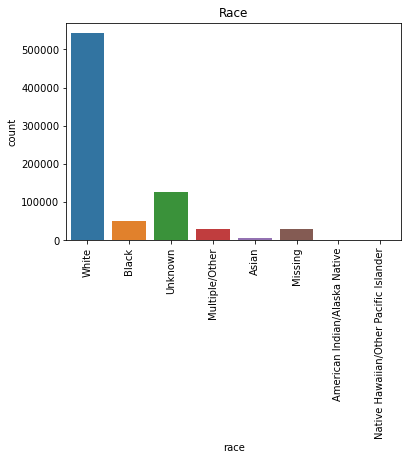

In [4]:
sns.countplot(x='race', data=df_cdc);
plt.title('Race');
plt.xticks(rotation=90);

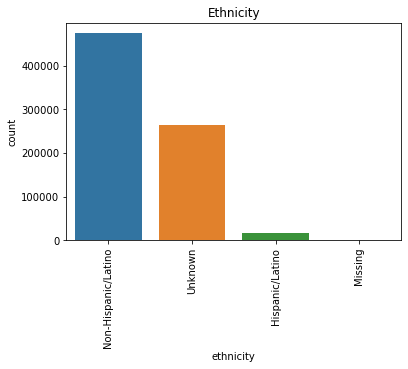

In [5]:
sns.countplot(x='ethnicity', data=df_cdc);
plt.title('Ethnicity');
plt.xticks(rotation=90);

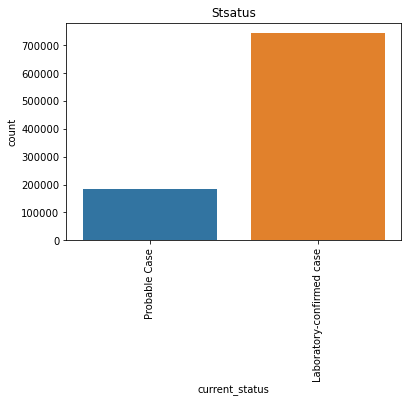

In [6]:
sns.countplot(x='current_status', data=df_cdc);
plt.title('Status');
plt.xticks(rotation=90);

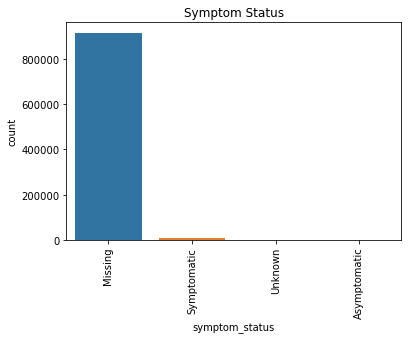

In [7]:
sns.countplot(x='symptom_status', data=df_cdc);
plt.title('Symptom Status');
plt.xticks(rotation=90);

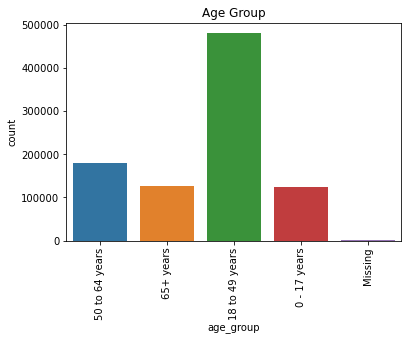

In [8]:
sns.countplot(x='age_group', data=df_cdc);
plt.title('Age Group');
plt.xticks(rotation=90);

In [9]:
df_cdc_ohe = pd.get_dummies(data=df_cdc,columns=['race','ethnicity','age_group', 'sex','underlying_conditions_yn', 'current_status'])

In [10]:
df_cdc_ohe.head()

,case_month,res_state,state_fips_code,res_county,Population,Pop_Density,Cases_per_Pop,county_fips_code,case_positive_specimen_interval,case_onset_interval,...,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,age_group_Missing,sex_Female,sex_Male,sex_Unknown,underlying_conditions_yn_Yes,current_status_Laboratory-confirmed case,current_status_Probable Case
0,2020-01,IN,18,NaN,0,0.0,NaN,NaN,52.0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,2020-01,IN,18,NaN,0,0.0,NaN,NaN,50.0,NaN,...,0,0,0,0,0,0,0,0,1,0
2,2020-01,IN,18,NaN,0,0.0,NaN,NaN,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,2020-01,IN,18,NaN,0,0.0,NaN,NaN,52.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,2020-01,IN,18,NaN,0,0.0,NaN,NaN,52.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [11]:
correlations = df_cdc_ohe.corr()['current_status_Laboratory-confirmed case'].sort_values()
print('Most Positive Correlations:\n', correlations.sort_values(ascending=False).head(20))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Positive Correlations:
 current_status_Laboratory-confirmed case       1.000000
ethnicity_Unknown                              0.138533
Pop_Density                                    0.079554
Population                                     0.067032
race_Unknown                                   0.059330
county_fips_code                               0.049843
race_Black                                     0.041063
race_Missing                                   0.038376
race_Multiple/Other                            0.034148
ethnicity_Hispanic/Latino                      0.028483
age_group_65+ years                            0.026381
sex_Unknown                                    0.020390
race_Asian                                     0.013903
age_group_50 to 64 years                       0.013424
age_group_Missing                              0.008613
ethnicity_Missing                              0.007012
sex_Male                                       0.005713
race_Native Hawaiia

In [12]:
df_cdc_ohe_corr = df_cdc_ohe.corr()
table = df_cdc_ohe_corr.style.background_gradient(cmap='Blues').format('{0:,.3f}')
table

,state_fips_code,Population,Pop_Density,Cases_per_Pop,county_fips_code,case_positive_specimen_interval,case_onset_interval,race_American Indian/Alaska Native,race_Asian,race_Black,race_Missing,race_Multiple/Other,race_Native Hawaiian/Other Pacific Islander,race_Unknown,race_White,ethnicity_Hispanic/Latino,ethnicity_Missing,ethnicity_Non-Hispanic/Latino,ethnicity_Unknown,age_group_0 - 17 years,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,age_group_Missing,sex_Female,sex_Male,sex_Unknown,underlying_conditions_yn_Yes,current_status_Laboratory-confirmed case,current_status_Probable Case
state_fips_code,1.000,-0.008,-0.007,0.004,0.013,0.003,-0.001,-0.000,-0.001,-0.002,-0.000,-0.002,-0.000,0.001,-0.005,-0.001,-0.000,-0.003,-0.004,-0.003,0.004,0.001,-0.002,-0.005,0.002,0.000,-0.001,0.024,-0.004,0.004
Population,-0.008,1.000,0.988,-0.546,-0.000,0.000,-0.013,0.014,0.085,0.281,0.065,0.163,0.015,0.085,-0.164,0.079,-0.009,-0.037,0.136,0.005,0.056,-0.014,-0.040,-0.011,0.038,0.026,-0.003,0.003,0.067,-0.067
Pop_Density,-0.007,0.988,1.000,-0.483,0.048,0.000,-0.012,0.014,0.084,0.277,0.062,0.161,0.016,0.081,-0.158,0.072,-0.008,-0.042,0.144,0.005,0.055,-0.015,-0.040,-0.011,0.037,0.025,-0.002,0.004,0.080,-0.080
Cases_per_Pop,0.004,-0.546,-0.483,1.000,-0.134,-0.004,nan,-0.004,-0.039,-0.118,-0.054,-0.074,-0.005,-0.092,0.119,-0.052,nan,0.052,-0.129,-0.011,-0.043,0.011,0.037,nan,-0.033,-0.039,-0.013,-0.005,-0.025,0.025
county_fips_code,0.013,-0.000,0.048,-0.134,1.000,-0.001,0.016,0.001,-0.005,0.008,0.014,-0.015,0.001,-0.003,-0.007,-0.014,-0.005,-0.034,0.040,-0.012,0.012,-0.006,-0.003,-0.003,-0.013,-0.002,0.030,0.001,0.050,-0.050
case_positive_specimen_interval,0.003,0.000,0.000,-0.004,-0.001,1.000,-0.343,-0.000,-0.001,0.002,-0.004,-0.000,-0.000,-0.006,-0.004,-0.000,nan,-0.001,-0.009,-0.006,-0.005,-0.001,0.005,nan,0.000,-0.007,-0.002,0.013,-0.015,0.015
case_onset_interval,-0.001,-0.013,-0.012,nan,0.016,-0.343,1.000,nan,-0.001,-0.007,-0.000,-0.002,nan,-0.004,0.002,-0.004,nan,0.002,-0.005,-0.002,-0.002,-0.004,0.012,nan,-0.002,0.009,-0.000,-0.002,0.001,-0.001
race_American Indian/Alaska Native,-0.000,0.014,0.014,-0.004,0.001,-0.000,nan,1.000,-0.000,-0.001,-0.001,-0.001,-0.000,-0.002,-0.007,-0.001,-0.000,-0.006,-0.004,-0.002,0.006,-0.003,-0.002,-0.000,0.006,-0.005,-0.000,-0.000,0.003,-0.003
race_Asian,-0.001,0.085,0.084,-0.039,-0.005,-0.001,-0.001,-0.000,1.000,-0.019,-0.015,-0.015,-0.001,-0.032,-0.097,-0.011,-0.001,0.044,-0.033,-0.015,0.050,-0.021,-0.030,-0.001,-0.008,0.018,-0.005,-0.000,0.014,-0.014
race_Black,-0.002,0.281,0.277,-0.118,0.008,0.002,-0.007,-0.001,-0.019,1.000,-0.043,-0.043,-0.002,-0.094,-0.281,-0.028,-0.003,0.096,-0.029,0.007,0.046,-0.019,-0.039,-0.004,0.032,-0.003,-0.013,0.008,0.041,-0.041


## Hub Mph

https://hub.mph.in.gov/dataset/covid-19-case-data/resource/46b310b9-2f29-4a51-90dc-3886d9cf4ac1

In [13]:
df_hub = pd.read_csv("hub_mph_covid_report_demo_combined.csv")

In [14]:
df_hub.head(20)

,DATE,Attribute,Value,COVID_TEST,COVID_COUNT,COVID_DEATHS
0,2020-02-26,Age_Group,0 to <1,0,0,0
1,2020-02-26,Age_Group,0-19,1,0,0
2,2020-02-26,Age_Group,1-4,0,0,0
3,2020-02-26,Age_Group,12-17,0,0,0
4,2020-02-26,Age_Group,18-19,0,0,0
5,2020-02-26,Age_Group,20-29,2,0,0
6,2020-02-26,Age_Group,30-39,0,0,0
7,2020-02-26,Age_Group,40-49,0,0,0
8,2020-02-26,Age_Group,5-11,0,0,0
9,2020-02-26,Age_Group,50-59,0,0,0


In [15]:
Attribute = ['Age_Group']
df_hub_Age = df_hub[df_hub.Attribute.isin(Attribute)]

In [16]:
df_hub_Age_agg = df_hub_Age.groupby(["Value"], as_index=False)["COVID_COUNT"].sum()

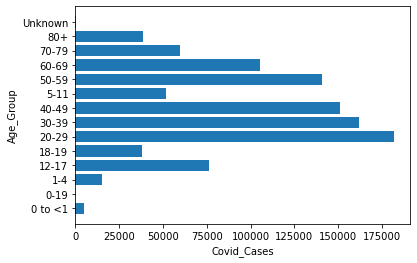

In [17]:
import matplotlib.pyplot as plt
   
Age_Group = df_hub_Age_agg['Value']
Covid_Cases = df_hub_Age_agg['COVID_COUNT']

plt.barh(Age_Group,Covid_Cases)
plt.ylabel('Age_Group')
plt.xlabel('Covid_Cases')
plt.show()

In [18]:
df_hub_ohe = df_hub

## Covid Tracking

https://covidtracking.com/data/state/indiana

In [19]:
df_cti = pd.read_csv("Covid_tracking_Indiana_Combined_Data.csv")

In [20]:
df_cti.head()

,date,FormattedDate,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,Tests_Black,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown,Tests_LatinX,Tests_Multiracial,Tests_NHPI,Tests_Other,Tests_White,Tests_Total
0,27-Feb-20,20200227,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28-Feb-20,20200228,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29-Feb-20,20200229,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-Mar-20,20200301,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02-Mar-20,20200302,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_cti_2 = df_cti

df_cti_2['Date_formatted'] = pd.to_datetime(df_cti_2['date'])
df_cti_2.head()

,date,FormattedDate,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown,Tests_LatinX,Tests_Multiracial,Tests_NHPI,Tests_Other,Tests_White,Tests_Total,Date_formatted
0,27-Feb-20,20200227,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-27
1,28-Feb-20,20200228,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28
2,29-Feb-20,20200229,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29
3,01-Mar-20,20200301,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01
4,02-Mar-20,20200302,IN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02


## Covid Variants Data

In [21]:
df_rd = pd.read_csv("RegionsDashboard.csv")

In [22]:
df_rd.head(20)

,Day of Week Ending,Lineage Bin,Modeltype,Usa Or Hhsregion,Variant,95CI,Share
0,"October 23, 2021",Other,smoothed,1,Other*,0.1-0.7%,0.002379
1,"October 30, 2021",Other,smoothed,1,Other*,0.1-0.7%,0.002290
2,"October 23, 2021",Other,smoothed,2,Other*,0.2-3.1%,0.008148
3,"October 30, 2021",Other,smoothed,2,Other*,0.1-3.2%,0.008233
4,"October 23, 2021",Other,smoothed,3,Other*,0.1-0.8%,0.003002
5,"October 30, 2021",Other,smoothed,3,Other*,0.1-0.8%,0.002975
6,"October 23, 2021",Other,smoothed,4,Other*,0.4-2.1%,0.009953
7,"October 30, 2021",Other,smoothed,4,Other*,0.5-2.1%,0.010140
8,"October 23, 2021",Other,smoothed,5,Other*,0.3-1.2%,0.006429
9,"October 30, 2021",Other,smoothed,5,Other*,0.4-1.2%,0.006517
